In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Income Survey Dataset.csv')
df

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72638,72639,1603.9917,35,23,5,1,4,1,2,1,...,0,23000,61825,0,28400,0,3,4,99999996,1800
72639,72640,162.6815,24,13,12,2,1,1,3,1,...,103000,0,132400,0,27350,0,3,4,99999996,99999996
72640,72641,162.6815,24,13,13,1,1,1,3,2,...,103000,0,132400,0,27350,0,3,4,99999996,99999996
72641,72642,162.6815,24,13,5,1,4,1,2,2,...,103000,0,132400,0,27350,0,3,4,99999996,99999996


In [3]:
# Display basic dataset information
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Shape: (72643, 38)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 no

In [4]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [5]:
# Define target variable
target = 'income_after_tax'  # or 'Total_income' based on your preference
print(f"\nTarget Variable: {target}")


Target Variable: income_after_tax


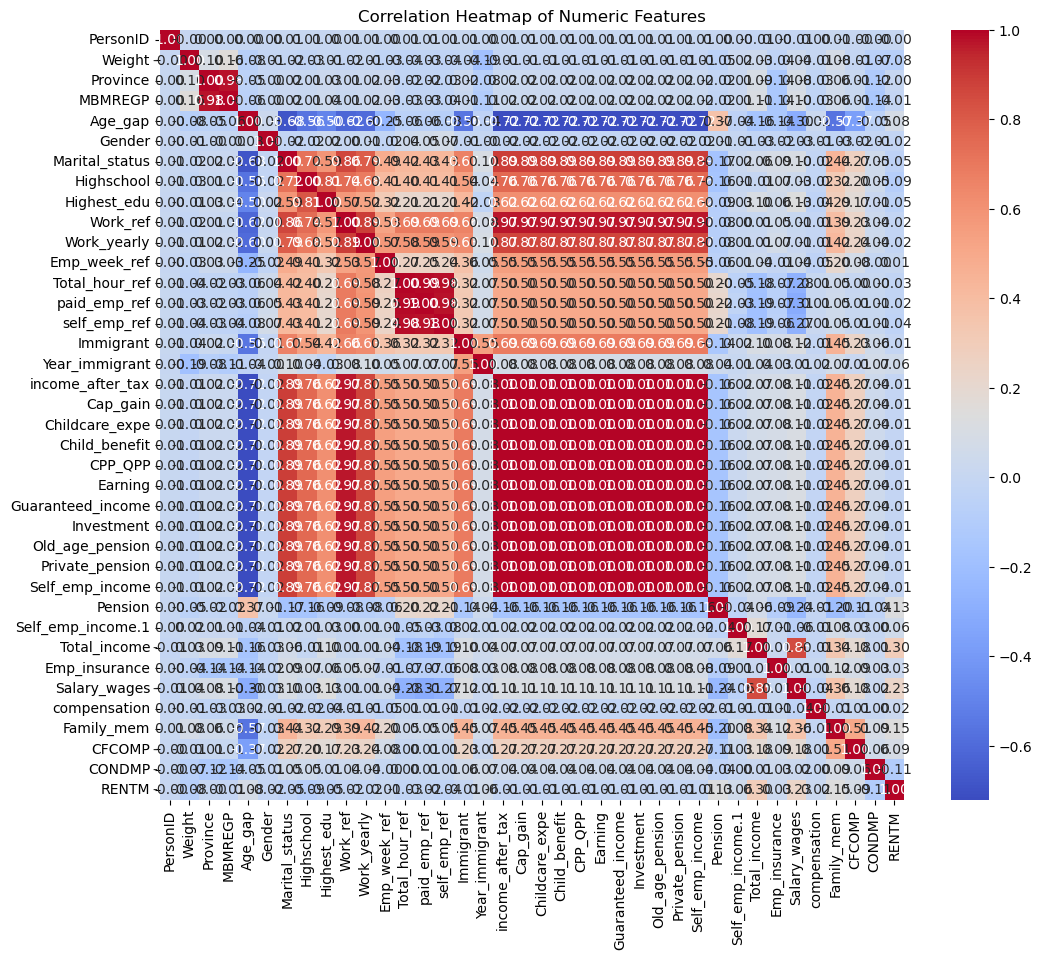

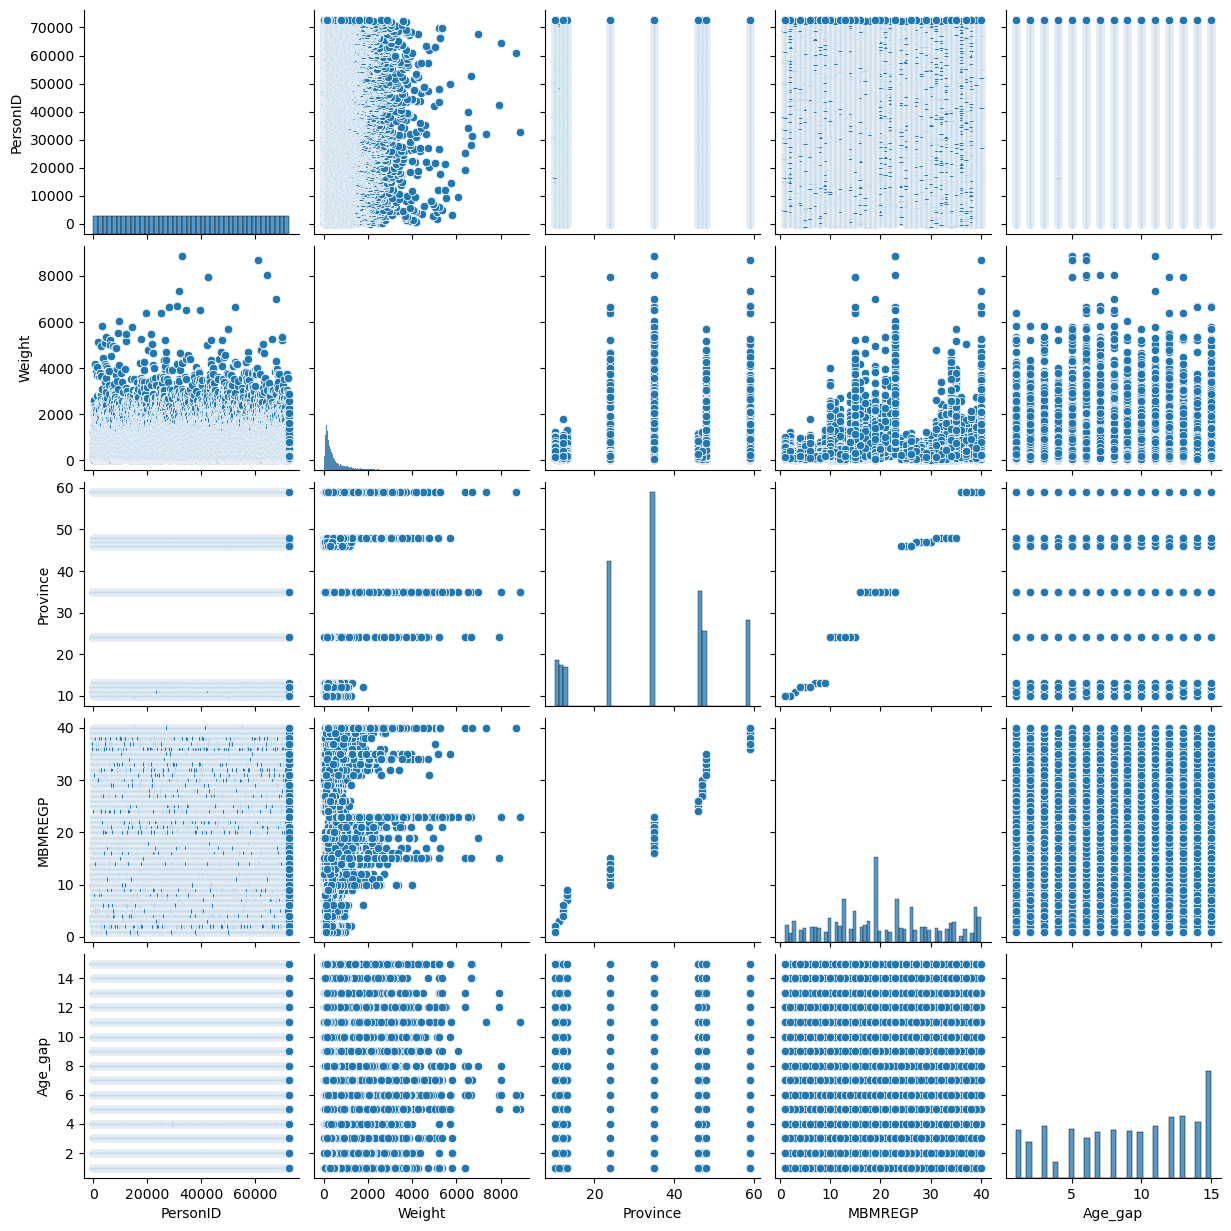

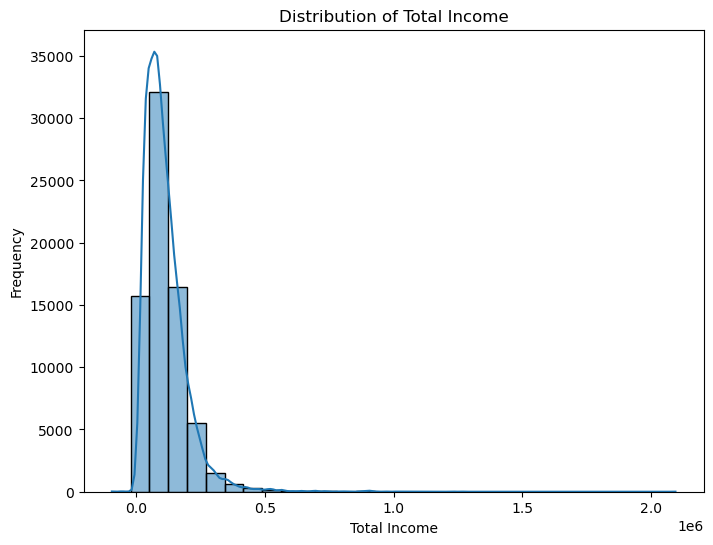

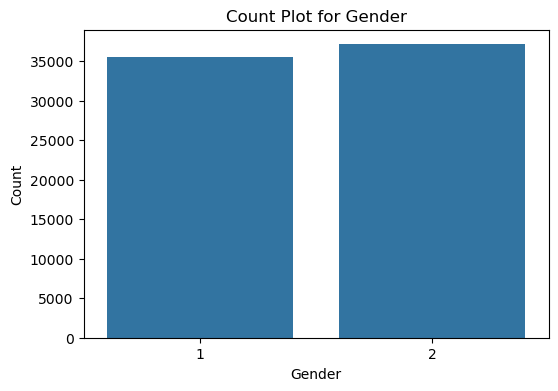

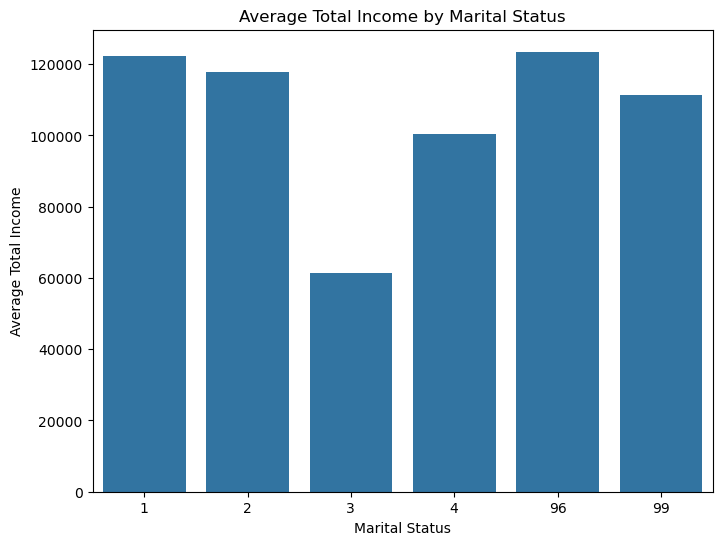

In [9]:
# Reduce the dataframe to only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check if there are four or more numeric columns for correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12,10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap.')

# Pair Plot for a subset of numeric columns to understand pairwise relationships
sample_columns = numeric_df.columns.tolist()[:5]  # Using only first five numeric columns for clarity
sns.pairplot(numeric_df[sample_columns])
plt.show()

# Distribution of Total_income using histogram
plt.figure(figsize=(8,6))
sns.histplot(df['Total_income'], kde=True, bins=30)
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()

# Count Plot (Pie chart style is not natively supported, so we use countplot) for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar Plot: Average Total Income by Marital Status
plt.figure(figsize=(8,6))
avg_income_by_marital = df.groupby('Marital_status')['Total_income'].mean().reset_index()
sns.barplot(x='Marital_status', y='Total_income', data=avg_income_by_marital)
plt.title('Average Total Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Income')
plt.show()

In [7]:
# Check if target is skewed
if df[target].skew() > 1:
    print(f"\nTarget is right-skewed (skew: {df[target].skew():.2f}). Applying log transformation.")
    # Apply log transformation to handle skewness (adding 1 to handle zeros)
    df[f'{target}_log'] = np.log1p(df[target])
    # Update target to log-transformed version
    target = f'{target}_log'


Target is right-skewed (skew: 1.70). Applying log transformation.


In [8]:
# Remove rows with missing target values
df_clean = df.dropna(subset=[target])
print(f"\nRows after removing missing target values: {len(df_clean)}")


Rows after removing missing target values: 72369


In [9]:
# Identify features to exclude (including the target and direct income components that would cause data leakage)
exclude_columns = [
    'PersonID', target, 'income_after_tax', 'Total_income', 'income_after_tax_log', 'Total_income_log',
    # Exclude other direct income components to prevent data leakage
    'Earning', 'Salary_wages', 'Self_emp_income'
]

In [10]:
# Select features, removing any excluded columns that are actually in the dataframe
features = [col for col in df_clean.columns if col not in exclude_columns or col not in df_clean.columns]

In [11]:
# Split into X (features) and y (target)
X = df_clean[features]
y = df_clean[target]

In [12]:
# Split categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
print(f"\nCategorical Features: {categorical_features}")
print(f"\nNumerical Features: {numerical_features}")


Categorical Features: []

Numerical Features: ['Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender', 'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref', 'self_emp_ref', 'Immigrant', 'Year_immigrant', 'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension', 'Pension', 'Self_emp_income.1', 'Emp_insurance', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP', 'RENTM']


In [14]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (57895, 32)
Testing set size: (14474, 32)


In [16]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name, preprocessor):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # If the target was log-transformed, convert predictions back to original scale
    if '_log' in target:
        y_pred_original = np.expm1(y_pred)
        y_test_original = np.expm1(y_test)
        
        # Calculate metrics on original scale
        rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mae_original = mean_absolute_error(y_test_original, y_pred_original)
        r2_original = r2_score(y_test_original, y_pred_original)
        
        print(f"\n{model_name} Metrics (Original Scale):")
        print(f"RMSE: ${rmse_original:.2f}")
        print(f"MAE: ${mae_original:.2f}")
        print(f"R²: {r2_original:.4f}")
    
    # Calculate metrics on transformed scale (if applicable)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Metrics (Transformed Scale):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return y_pred

In [17]:
# 3.1 Linear Regression
lin_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lin_reg_pipeline.fit(X_train, y_train)
y_pred_lin = evaluate_model(lin_reg_pipeline, X_test, y_test, "Linear Regression", preprocessor)


Linear Regression Metrics (Original Scale):
RMSE: $7785307.34
MAE: $2462931.98
R²: 0.9596

Linear Regression Metrics (Transformed Scale):
RMSE: 1.2497
MAE: 0.6281
R²: 0.8782


In [18]:
# 3.2 Ridge Regression (Linear Regression with L2 regularization)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = evaluate_model(ridge_pipeline, X_test, y_test, "Ridge Regression", preprocessor)


Ridge Regression Metrics (Original Scale):
RMSE: $8156435.35
MAE: $2656717.70
R²: 0.9557

Ridge Regression Metrics (Transformed Scale):
RMSE: 1.2785
MAE: 0.6424
R²: 0.8725


In [19]:
# 3.3 Random Forest Regression
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest", preprocessor)


Random Forest Metrics (Original Scale):
RMSE: $21416.53
MAE: $10265.37
R²: 1.0000

Random Forest Metrics (Transformed Scale):
RMSE: 0.8943
MAE: 0.3832
R²: 0.9376


In [20]:
# 3.4 XGBoost Regression
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost", preprocessor)


XGBoost Metrics (Original Scale):
RMSE: $456741.67
MAE: $153673.37
R²: 0.9999

XGBoost Metrics (Transformed Scale):
RMSE: 0.9034
MAE: 0.3965
R²: 0.9363


In [21]:
# ----------------------
# 4. Feature Importance Analysis
# ----------------------

# 4.1 Linear Regression Coefficients
def get_linear_model_feature_importance(pipeline):
    feature_names = []
    # Get feature names from numerical features
    feature_names.extend(numerical_features)
    
    # Get feature names from one-hot encoded categorical features
    for i, category in enumerate(categorical_features):
        encoder = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
        for category_value in encoder.categories_[i]:
            feature_names.append(f"{category}_{category_value}")
    
    # Get coefficients
    coefficients = pipeline.named_steps['regressor'].coef_
    
    # Create a DataFrame with feature names and coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_names[:len(coefficients)],  # Ensure lengths match
        'Importance': coefficients
    })
    
    # Sort by absolute importance
    feature_importance['Abs_Importance'] = np.abs(feature_importance['Importance'])
    feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False)
    
    return feature_importance

In [22]:
try:
    print("\nLinear Regression Feature Importance:")
    lin_reg_importance = get_linear_model_feature_importance(lin_reg_pipeline)
    print(lin_reg_importance.head(15))
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = lin_reg_importance.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 15 Features (Linear Regression)')
    plt.tight_layout()
    plt.savefig('linear_reg_feature_importance.png')
    plt.close()
except Exception as e:
    print(f"Error getting Linear Regression feature importance: {e}")


Linear Regression Feature Importance:
              Feature   Importance  Abs_Importance
18      Child_benefit  2347.412766     2347.412766
17     Childcare_expe -2239.565632     2239.565632
20  Guaranteed_income -1655.012303     1655.012303
19            CPP_QPP  1507.307311     1507.307311
22    Old_age_pension  -626.987836      626.987836
23    Private_pension   506.807318      506.807318
21         Investment   354.483302      354.483302
16           Cap_gain  -186.447847      186.447847
8            Work_ref    -4.486397        4.486397
11     Total_hour_ref     1.624651        1.624651
12       paid_emp_ref    -1.564420        1.564420
3             Age_gap     0.661679        0.661679
6          Highschool    -0.387686        0.387686
7         Highest_edu     0.374751        0.374751
13       self_emp_ref     0.366046        0.366046


In [23]:
# 4.2 Random Forest Feature Importance
def get_rf_feature_importance(pipeline):
    # Get feature names after preprocessing
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = []
    
    # Get numerical feature names (these stay the same)
    feature_names.extend(numerical_features)
    
    # Get one-hot encoded feature names
    for i, category in enumerate(categorical_features):
        encoder = preprocessor.transformers_[1][1].named_steps['onehot']
        for category_value in encoder.categories_[i]:
            feature_names.append(f"{category}_{category_value}")
    
    # Get feature importances
    importances = pipeline.named_steps['regressor'].feature_importances_
    
    # Create DataFrame
    feature_importance = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # Ensure lengths match
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    return feature_importance

In [24]:
try:
    print("\nRandom Forest Feature Importance:")
    rf_importance = get_rf_feature_importance(rf_pipeline)
    print(rf_importance.head(15))
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = rf_importance.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 15 Features (Random Forest)')
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png')
    plt.close()
except Exception as e:
    print(f"Error getting Random Forest feature importance: {e}")


Random Forest Feature Importance:
              Feature  Importance
19            CPP_QPP    0.159886
21         Investment    0.156842
23    Private_pension    0.136422
16           Cap_gain    0.090227
22    Old_age_pension    0.082573
18      Child_benefit    0.069503
17     Childcare_expe    0.065451
8            Work_ref    0.051519
20  Guaranteed_income    0.041699
3             Age_gap    0.039010
10       Emp_week_ref    0.021550
0              Weight    0.013653
11     Total_hour_ref    0.012802
2             MBMREGP    0.007227
5      Marital_status    0.005347


In [25]:
# 4.3 XGBoost Feature Importance
def get_xgb_feature_importance(pipeline):
    # Similar approach as Random Forest
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = []
    
    # Get numerical feature names
    feature_names.extend(numerical_features)
    
    # Get one-hot encoded feature names
    for i, category in enumerate(categorical_features):
        encoder = preprocessor.transformers_[1][1].named_steps['onehot']
        for category_value in encoder.categories_[i]:
            feature_names.append(f"{category}_{category_value}")
    
    # Get feature importances
    importances = pipeline.named_steps['regressor'].feature_importances_
    
    # Create DataFrame
    feature_importance = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # Ensure lengths match
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    return feature_importance

In [26]:
try:
    print("\nXGBoost Feature Importance:")
    xgb_importance = get_xgb_feature_importance(xgb_pipeline)
    print(xgb_importance.head(15))
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = xgb_importance.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 15 Features (XGBoost)')
    plt.tight_layout()
    plt.savefig('xgb_feature_importance.png')
    plt.close()
except Exception as e:
    print(f"Error getting XGBoost feature importance: {e}")


XGBoost Feature Importance:
              Feature  Importance
3             Age_gap    0.608746
20  Guaranteed_income    0.142856
21         Investment    0.073678
8            Work_ref    0.041645
23    Private_pension    0.040260
10       Emp_week_ref    0.014376
18      Child_benefit    0.012751
19            CPP_QPP    0.011698
9         Work_yearly    0.008922
12       paid_emp_ref    0.006536
5      Marital_status    0.006197
7         Highest_edu    0.003345
28         Family_mem    0.002990
4              Gender    0.002469
29             CFCOMP    0.002209


In [27]:
# 4.4 SHAP Values for XGBoost (more detailed feature impact analysis)
try:
    # Apply preprocessor to get transformed data
    X_test_transformed = preprocessor.transform(X_test)
    
    # Create a feature name list
    feature_names = []
    feature_names.extend(numerical_features)
    for i, category in enumerate(categorical_features):
        encoder = preprocessor.transformers_[1][1].named_steps['onehot']
        for category_value in encoder.categories_[i]:
            feature_names.append(f"{category}_{category_value}")
    
    # Get SHAP values
    explainer = shap.Explainer(xgb_pipeline.named_steps['regressor'])
    shap_values = explainer(X_test_transformed)
    
    # SHAP summary plot
    plt.figure()
    shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names[:X_test_transformed.shape[1]], show=False)
    plt.tight_layout()
    plt.savefig('shap_summary.png')
    plt.close()
    
    print("\nSHAP analysis complete. See 'shap_summary.png' for the visualization.")
except Exception as e:
    print(f"Error in SHAP analysis: {e}")
    print("Continuing without SHAP analysis...")


SHAP analysis complete. See 'shap_summary.png' for the visualization.


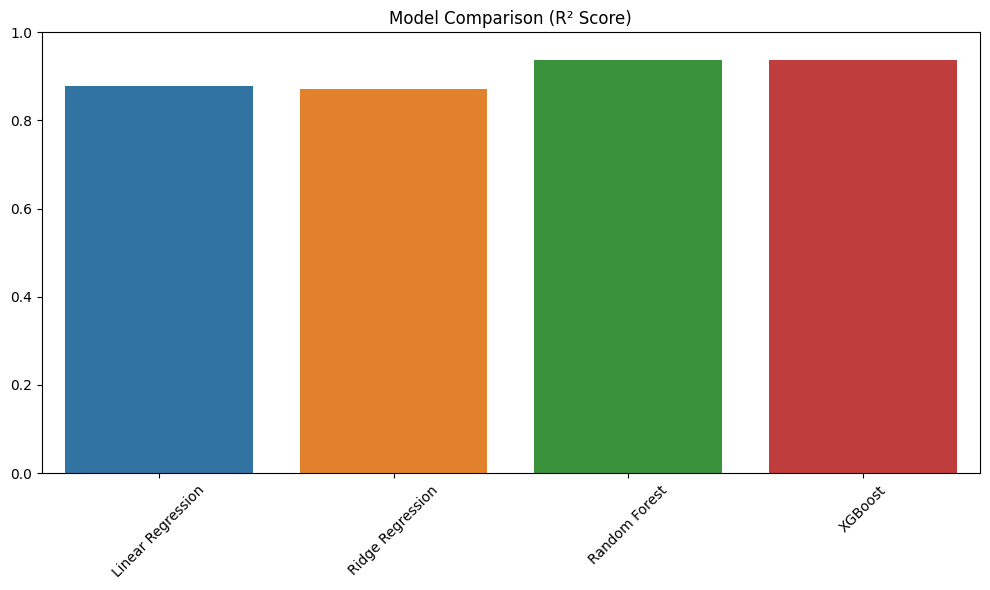


Model Comparison Complete.
Best performing model based on R² score: Random Forest


In [28]:
# Compare model performance
models = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost']

# Get R² scores
scores = [
    r2_score(y_test, y_pred_lin),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb)
]

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Comparison (R² Score)')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nModel Comparison Complete.")
print("Best performing model based on R² score:", models[np.argmax(scores)])